# Keras custom callbacks


## Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import datetime
import io

from PIL import Image
from IPython.display import Image as IPyImage
import imageio

print("Version: ", tf.__version__)
tf.get_logger().setLevel('INFO')

Version:  2.9.1


In [2]:
# Define the Keras model to add callbacks to
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(1, activation = 'linear', input_dim = 784))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.1), loss='mean_squared_error', metrics=['mae'])
    return model

In [3]:
# Load example MNIST data and pre-process it
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

In [4]:
class MyCustomCallback(tf.keras.callbacks.Callback):

    def on_train_batch_begin(self, batch, logs=None):
        print('Training: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

    def on_train_batch_end(self, batch, logs=None):
        print('Training: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

In [5]:
model = get_model()
_ = model.fit(x_train, y_train,
          batch_size=64,
          epochs=1,
          steps_per_epoch=5,
          verbose=0,
          callbacks=[MyCustomCallback()])

/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Training: batch 0 begins at 07:29:40.164730
Training: batch 0 ends at 07:29:40.945274
Training: batch 1 begins at 07:29:40.946399
Training: batch 1 ends at 07:29:40.947578
Training: batch 2 begins at 07:29:40.947957
Training: batch 2 ends at 07:29:40.948935
Training: batch 3 begins at 07:29:40.949210
Training: batch 3 ends at 07:29:40.950220
Training: batch 4 begins at 07:29:40.955973
Training: batch 4 ends at 07:29:40.957639


In [6]:
callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_end=lambda epoch,logs: 
    print("Epoch: {}, Val/Train loss ratio: {:.2f}".format(epoch, logs["val_loss"] / logs["loss"]))
)

model = get_model()
_ = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=64,
          epochs=3,
          verbose=0,
          callbacks=[callback])

Epoch: 0, Val/Train loss ratio: 0.53
Epoch: 1, Val/Train loss ratio: 1.54
Epoch: 2, Val/Train loss ratio: 0.24


In [7]:
callback = tf.keras.callbacks.LambdaCallback(
    on_batch_end=lambda batch,logs: 
    print("Epoch: {}, Val/Train loss ratio: {:.2f}".format(batch, logs["loss"]))
)

model = get_model()
history = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=64,
          epochs=3,
          verbose=0,
          callbacks=[callback])

Epoch: 0, Val/Train loss ratio: 28.63
Epoch: 1, Val/Train loss ratio: 474.32
Epoch: 2, Val/Train loss ratio: 323.61
Epoch: 3, Val/Train loss ratio: 244.98
Epoch: 4, Val/Train loss ratio: 197.47
Epoch: 5, Val/Train loss ratio: 165.88
Epoch: 6, Val/Train loss ratio: 143.20
Epoch: 7, Val/Train loss ratio: 126.23
Epoch: 8, Val/Train loss ratio: 112.80
Epoch: 9, Val/Train loss ratio: 101.93
Epoch: 10, Val/Train loss ratio: 93.10
Epoch: 11, Val/Train loss ratio: 85.72
Epoch: 12, Val/Train loss ratio: 79.43
Epoch: 13, Val/Train loss ratio: 74.05
Epoch: 14, Val/Train loss ratio: 69.47
Epoch: 15, Val/Train loss ratio: 65.40
Epoch: 16, Val/Train loss ratio: 61.79
Epoch: 17, Val/Train loss ratio: 58.67
Epoch: 18, Val/Train loss ratio: 56.05
Epoch: 19, Val/Train loss ratio: 53.82
Epoch: 20, Val/Train loss ratio: 52.39
Epoch: 21, Val/Train loss ratio: 53.73
Epoch: 22, Val/Train loss ratio: 58.13
Epoch: 23, Val/Train loss ratio: 59.48
Epoch: 24, Val/Train loss ratio: 57.93
Epoch: 25, Val/Train loss 

Epoch: 266, Val/Train loss ratio: 34.80
Epoch: 267, Val/Train loss ratio: 34.75
Epoch: 268, Val/Train loss ratio: 34.70
Epoch: 269, Val/Train loss ratio: 34.66
Epoch: 270, Val/Train loss ratio: 34.67
Epoch: 271, Val/Train loss ratio: 34.75
Epoch: 272, Val/Train loss ratio: 34.80
Epoch: 273, Val/Train loss ratio: 34.83
Epoch: 274, Val/Train loss ratio: 34.84
Epoch: 275, Val/Train loss ratio: 34.87
Epoch: 276, Val/Train loss ratio: 34.94
Epoch: 277, Val/Train loss ratio: 34.99
Epoch: 278, Val/Train loss ratio: 35.08
Epoch: 279, Val/Train loss ratio: 35.13
Epoch: 280, Val/Train loss ratio: 35.10
Epoch: 281, Val/Train loss ratio: 35.03
Epoch: 282, Val/Train loss ratio: 34.93
Epoch: 283, Val/Train loss ratio: 34.83
Epoch: 284, Val/Train loss ratio: 34.73
Epoch: 285, Val/Train loss ratio: 34.63
Epoch: 286, Val/Train loss ratio: 34.54
Epoch: 287, Val/Train loss ratio: 34.44
Epoch: 288, Val/Train loss ratio: 34.35
Epoch: 289, Val/Train loss ratio: 34.30
Epoch: 290, Val/Train loss ratio: 34.28


Epoch: 504, Val/Train loss ratio: 33.95
Epoch: 505, Val/Train loss ratio: 33.91
Epoch: 506, Val/Train loss ratio: 33.87
Epoch: 507, Val/Train loss ratio: 33.83
Epoch: 508, Val/Train loss ratio: 33.78
Epoch: 509, Val/Train loss ratio: 33.72
Epoch: 510, Val/Train loss ratio: 33.67
Epoch: 511, Val/Train loss ratio: 33.62
Epoch: 512, Val/Train loss ratio: 33.58
Epoch: 513, Val/Train loss ratio: 33.57
Epoch: 514, Val/Train loss ratio: 33.60
Epoch: 515, Val/Train loss ratio: 33.70
Epoch: 516, Val/Train loss ratio: 33.77
Epoch: 517, Val/Train loss ratio: 33.79
Epoch: 518, Val/Train loss ratio: 33.83
Epoch: 519, Val/Train loss ratio: 33.86
Epoch: 520, Val/Train loss ratio: 33.87
Epoch: 521, Val/Train loss ratio: 33.87
Epoch: 522, Val/Train loss ratio: 33.88
Epoch: 523, Val/Train loss ratio: 33.87
Epoch: 524, Val/Train loss ratio: 33.85
Epoch: 525, Val/Train loss ratio: 33.84
Epoch: 526, Val/Train loss ratio: 33.81
Epoch: 527, Val/Train loss ratio: 33.77
Epoch: 528, Val/Train loss ratio: 33.75


Epoch: 729, Val/Train loss ratio: 33.39
Epoch: 730, Val/Train loss ratio: 33.35
Epoch: 731, Val/Train loss ratio: 33.32
Epoch: 732, Val/Train loss ratio: 33.29
Epoch: 733, Val/Train loss ratio: 33.26
Epoch: 734, Val/Train loss ratio: 33.26
Epoch: 735, Val/Train loss ratio: 33.30
Epoch: 736, Val/Train loss ratio: 33.40
Epoch: 737, Val/Train loss ratio: 33.49
Epoch: 738, Val/Train loss ratio: 33.52
Epoch: 739, Val/Train loss ratio: 33.54
Epoch: 740, Val/Train loss ratio: 33.53
Epoch: 741, Val/Train loss ratio: 33.50
Epoch: 742, Val/Train loss ratio: 33.47
Epoch: 743, Val/Train loss ratio: 33.44
Epoch: 744, Val/Train loss ratio: 33.43
Epoch: 745, Val/Train loss ratio: 33.42
Epoch: 746, Val/Train loss ratio: 33.42
Epoch: 747, Val/Train loss ratio: 33.42
Epoch: 748, Val/Train loss ratio: 33.42
Epoch: 749, Val/Train loss ratio: 33.41
Epoch: 750, Val/Train loss ratio: 33.39
Epoch: 751, Val/Train loss ratio: 33.37
Epoch: 752, Val/Train loss ratio: 33.37
Epoch: 753, Val/Train loss ratio: 33.35


Epoch: 0, Val/Train loss ratio: 26.38
Epoch: 1, Val/Train loss ratio: 23.84
Epoch: 2, Val/Train loss ratio: 21.40
Epoch: 3, Val/Train loss ratio: 20.18
Epoch: 4, Val/Train loss ratio: 20.12
Epoch: 5, Val/Train loss ratio: 20.79
Epoch: 6, Val/Train loss ratio: 22.62
Epoch: 7, Val/Train loss ratio: 24.78
Epoch: 8, Val/Train loss ratio: 28.14
Epoch: 9, Val/Train loss ratio: 30.39
Epoch: 10, Val/Train loss ratio: 31.28
Epoch: 11, Val/Train loss ratio: 31.64
Epoch: 12, Val/Train loss ratio: 31.57
Epoch: 13, Val/Train loss ratio: 30.93
Epoch: 14, Val/Train loss ratio: 29.79
Epoch: 15, Val/Train loss ratio: 28.93
Epoch: 16, Val/Train loss ratio: 28.52
Epoch: 17, Val/Train loss ratio: 28.68
Epoch: 18, Val/Train loss ratio: 29.35
Epoch: 19, Val/Train loss ratio: 30.42
Epoch: 20, Val/Train loss ratio: 30.73
Epoch: 21, Val/Train loss ratio: 31.06
Epoch: 22, Val/Train loss ratio: 30.93
Epoch: 23, Val/Train loss ratio: 30.49
Epoch: 24, Val/Train loss ratio: 30.21
Epoch: 25, Val/Train loss ratio: 30

Epoch: 273, Val/Train loss ratio: 32.38
Epoch: 274, Val/Train loss ratio: 32.31
Epoch: 275, Val/Train loss ratio: 32.22
Epoch: 276, Val/Train loss ratio: 32.15
Epoch: 277, Val/Train loss ratio: 32.11
Epoch: 278, Val/Train loss ratio: 32.10
Epoch: 279, Val/Train loss ratio: 32.14
Epoch: 280, Val/Train loss ratio: 32.21
Epoch: 281, Val/Train loss ratio: 32.31
Epoch: 282, Val/Train loss ratio: 32.37
Epoch: 283, Val/Train loss ratio: 32.40
Epoch: 284, Val/Train loss ratio: 32.39
Epoch: 285, Val/Train loss ratio: 32.34
Epoch: 286, Val/Train loss ratio: 32.25
Epoch: 287, Val/Train loss ratio: 32.17
Epoch: 288, Val/Train loss ratio: 32.07
Epoch: 289, Val/Train loss ratio: 31.98
Epoch: 290, Val/Train loss ratio: 31.91
Epoch: 291, Val/Train loss ratio: 31.84
Epoch: 292, Val/Train loss ratio: 31.78
Epoch: 293, Val/Train loss ratio: 31.80
Epoch: 294, Val/Train loss ratio: 31.99
Epoch: 295, Val/Train loss ratio: 32.23
Epoch: 296, Val/Train loss ratio: 32.40
Epoch: 297, Val/Train loss ratio: 32.41


Epoch: 499, Val/Train loss ratio: 32.13
Epoch: 500, Val/Train loss ratio: 32.27
Epoch: 501, Val/Train loss ratio: 32.31
Epoch: 502, Val/Train loss ratio: 32.35
Epoch: 503, Val/Train loss ratio: 32.35
Epoch: 504, Val/Train loss ratio: 32.33
Epoch: 505, Val/Train loss ratio: 32.32
Epoch: 506, Val/Train loss ratio: 32.31
Epoch: 507, Val/Train loss ratio: 32.31
Epoch: 508, Val/Train loss ratio: 32.29
Epoch: 509, Val/Train loss ratio: 32.27
Epoch: 510, Val/Train loss ratio: 32.25
Epoch: 511, Val/Train loss ratio: 32.23
Epoch: 512, Val/Train loss ratio: 32.20
Epoch: 513, Val/Train loss ratio: 32.17
Epoch: 514, Val/Train loss ratio: 32.15
Epoch: 515, Val/Train loss ratio: 32.16
Epoch: 516, Val/Train loss ratio: 32.18
Epoch: 517, Val/Train loss ratio: 32.19
Epoch: 518, Val/Train loss ratio: 32.21
Epoch: 519, Val/Train loss ratio: 32.23
Epoch: 520, Val/Train loss ratio: 32.25
Epoch: 521, Val/Train loss ratio: 32.24
Epoch: 522, Val/Train loss ratio: 32.23
Epoch: 523, Val/Train loss ratio: 32.24


Epoch: 741, Val/Train loss ratio: 32.18
Epoch: 742, Val/Train loss ratio: 32.15
Epoch: 743, Val/Train loss ratio: 32.13
Epoch: 744, Val/Train loss ratio: 32.14
Epoch: 745, Val/Train loss ratio: 32.18
Epoch: 746, Val/Train loss ratio: 32.24
Epoch: 747, Val/Train loss ratio: 32.34
Epoch: 748, Val/Train loss ratio: 32.38
Epoch: 749, Val/Train loss ratio: 32.37
Epoch: 750, Val/Train loss ratio: 32.36
Epoch: 751, Val/Train loss ratio: 32.34
Epoch: 752, Val/Train loss ratio: 32.32
Epoch: 753, Val/Train loss ratio: 32.29
Epoch: 754, Val/Train loss ratio: 32.27
Epoch: 755, Val/Train loss ratio: 32.25
Epoch: 756, Val/Train loss ratio: 32.23
Epoch: 757, Val/Train loss ratio: 32.21
Epoch: 758, Val/Train loss ratio: 32.20
Epoch: 759, Val/Train loss ratio: 32.19
Epoch: 760, Val/Train loss ratio: 32.19
Epoch: 761, Val/Train loss ratio: 32.18
Epoch: 762, Val/Train loss ratio: 32.19
Epoch: 763, Val/Train loss ratio: 32.20
Epoch: 764, Val/Train loss ratio: 32.23
Epoch: 765, Val/Train loss ratio: 32.25


Epoch: 73, Val/Train loss ratio: 31.57
Epoch: 74, Val/Train loss ratio: 31.29
Epoch: 75, Val/Train loss ratio: 31.02
Epoch: 76, Val/Train loss ratio: 30.82
Epoch: 77, Val/Train loss ratio: 30.77
Epoch: 78, Val/Train loss ratio: 31.22
Epoch: 79, Val/Train loss ratio: 32.07
Epoch: 80, Val/Train loss ratio: 32.45
Epoch: 81, Val/Train loss ratio: 32.51
Epoch: 82, Val/Train loss ratio: 32.36
Epoch: 83, Val/Train loss ratio: 32.14
Epoch: 84, Val/Train loss ratio: 31.89
Epoch: 85, Val/Train loss ratio: 31.68
Epoch: 86, Val/Train loss ratio: 31.54
Epoch: 87, Val/Train loss ratio: 31.42
Epoch: 88, Val/Train loss ratio: 31.44
Epoch: 89, Val/Train loss ratio: 31.54
Epoch: 90, Val/Train loss ratio: 31.89
Epoch: 91, Val/Train loss ratio: 32.21
Epoch: 92, Val/Train loss ratio: 32.10
Epoch: 93, Val/Train loss ratio: 31.94
Epoch: 94, Val/Train loss ratio: 31.73
Epoch: 95, Val/Train loss ratio: 31.49
Epoch: 96, Val/Train loss ratio: 31.26
Epoch: 97, Val/Train loss ratio: 31.06
Epoch: 98, Val/Train loss

Epoch: 282, Val/Train loss ratio: 31.69
Epoch: 283, Val/Train loss ratio: 31.69
Epoch: 284, Val/Train loss ratio: 31.83
Epoch: 285, Val/Train loss ratio: 32.13
Epoch: 286, Val/Train loss ratio: 32.30
Epoch: 287, Val/Train loss ratio: 32.47
Epoch: 288, Val/Train loss ratio: 32.58
Epoch: 289, Val/Train loss ratio: 32.57
Epoch: 290, Val/Train loss ratio: 32.51
Epoch: 291, Val/Train loss ratio: 32.42
Epoch: 292, Val/Train loss ratio: 32.33
Epoch: 293, Val/Train loss ratio: 32.23
Epoch: 294, Val/Train loss ratio: 32.13
Epoch: 295, Val/Train loss ratio: 32.05
Epoch: 296, Val/Train loss ratio: 31.95
Epoch: 297, Val/Train loss ratio: 31.86
Epoch: 298, Val/Train loss ratio: 31.76
Epoch: 299, Val/Train loss ratio: 31.66
Epoch: 300, Val/Train loss ratio: 31.57
Epoch: 301, Val/Train loss ratio: 31.48
Epoch: 302, Val/Train loss ratio: 31.39
Epoch: 303, Val/Train loss ratio: 31.32
Epoch: 304, Val/Train loss ratio: 31.37
Epoch: 305, Val/Train loss ratio: 31.75
Epoch: 306, Val/Train loss ratio: 32.17


Epoch: 490, Val/Train loss ratio: 32.18
Epoch: 491, Val/Train loss ratio: 32.14
Epoch: 492, Val/Train loss ratio: 32.10
Epoch: 493, Val/Train loss ratio: 32.06
Epoch: 494, Val/Train loss ratio: 32.02
Epoch: 495, Val/Train loss ratio: 31.97
Epoch: 496, Val/Train loss ratio: 31.92
Epoch: 497, Val/Train loss ratio: 31.87
Epoch: 498, Val/Train loss ratio: 31.82
Epoch: 499, Val/Train loss ratio: 31.79
Epoch: 500, Val/Train loss ratio: 31.80
Epoch: 501, Val/Train loss ratio: 31.89
Epoch: 502, Val/Train loss ratio: 32.01
Epoch: 503, Val/Train loss ratio: 32.08
Epoch: 504, Val/Train loss ratio: 32.10
Epoch: 505, Val/Train loss ratio: 32.12
Epoch: 506, Val/Train loss ratio: 32.14
Epoch: 507, Val/Train loss ratio: 32.13
Epoch: 508, Val/Train loss ratio: 32.08
Epoch: 509, Val/Train loss ratio: 32.03
Epoch: 510, Val/Train loss ratio: 31.98
Epoch: 511, Val/Train loss ratio: 31.93
Epoch: 512, Val/Train loss ratio: 31.88
Epoch: 513, Val/Train loss ratio: 31.83
Epoch: 514, Val/Train loss ratio: 31.79


Epoch: 737, Val/Train loss ratio: 32.07
Epoch: 738, Val/Train loss ratio: 32.08
Epoch: 739, Val/Train loss ratio: 32.08
Epoch: 740, Val/Train loss ratio: 32.07
Epoch: 741, Val/Train loss ratio: 32.06
Epoch: 742, Val/Train loss ratio: 32.06
Epoch: 743, Val/Train loss ratio: 32.05
Epoch: 744, Val/Train loss ratio: 32.05
Epoch: 745, Val/Train loss ratio: 32.06
Epoch: 746, Val/Train loss ratio: 32.06
Epoch: 747, Val/Train loss ratio: 32.07
Epoch: 748, Val/Train loss ratio: 32.09
Epoch: 749, Val/Train loss ratio: 32.12
Epoch: 750, Val/Train loss ratio: 32.11
Epoch: 751, Val/Train loss ratio: 32.09
Epoch: 752, Val/Train loss ratio: 32.06
Epoch: 753, Val/Train loss ratio: 32.03
Epoch: 754, Val/Train loss ratio: 32.00
Epoch: 755, Val/Train loss ratio: 31.97
Epoch: 756, Val/Train loss ratio: 31.95
Epoch: 757, Val/Train loss ratio: 31.92
Epoch: 758, Val/Train loss ratio: 31.93
Epoch: 759, Val/Train loss ratio: 31.97
Epoch: 760, Val/Train loss ratio: 32.00
Epoch: 761, Val/Train loss ratio: 32.03


In [8]:
history.history

{'loss': [33.37744140625, 32.2525634765625, 32.09238052368164],
 'mae': [4.811906814575195, 4.6977152824401855, 4.695602893829346],
 'val_loss': [22.725370407104492, 33.44901657104492, 20.872081756591797],
 'val_mae': [4.147469520568848, 5.185911655426025, 3.9937238693237305]}

In [9]:
class DetectOverfittingCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold=0.7):
        super(DetectOverfittingCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        ratio = logs["val_loss"] / logs["loss"]
        print("Epoch: {}, Val/Train loss ratio: {:.2f}".format(epoch, ratio))

        if ratio > self.threshold:
            print("Stopping training...")
            self.model.stop_training = True

model = get_model()
_ = model.fit(x_train, y_train,
              validation_data=(x_test, y_test),
              batch_size=64,
              epochs=3,
              verbose=0,
              callbacks=[DetectOverfittingCallback()])

Epoch: 0, Val/Train loss ratio: 1.09
Stopping training...


Similarly, one can provide callbacks in `evaluate()` calls.

## Custom callback to Visualize predictions

In [10]:
# Load example MNIST data and pre-process it
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

In [11]:
# Visualization utilities
plt.rc('font', size=20)
plt.rc('figure', figsize=(15, 3))

def display_digits(inputs, outputs, ground_truth, epoch, n=10):
    plt.clf()

    plt.yticks([])
    plt.grid(None)
    inputs = np.reshape(inputs, [n, 28, 28])
    inputs = np.swapaxes(inputs, 0, 1)
    inputs = np.reshape(inputs, [28, 28*n])
    plt.imshow(inputs)
    plt.xticks([28*x+14 for x in range(n)], outputs)
    for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if outputs[i] == ground_truth[i]: 
            t.set_color('green') 
        else: 
            t.set_color('red')
    plt.grid(None)

In [12]:
GIF_PATH = './animation.gif'

In [13]:
class VisCallback(tf.keras.callbacks.Callback):
    def __init__(self, inputs, ground_truth, display_freq=10, n_samples=10):
        self.inputs = inputs
        self.ground_truth = ground_truth
        self.images = []
        self.display_freq = display_freq
        self.n_samples = n_samples

    def on_epoch_end(self, epoch, logs=None):
        # Randomly sample data
        indexes = np.random.choice(len(self.inputs), size=self.n_samples)
        X_test, y_test = self.inputs[indexes], self.ground_truth[indexes]
        predictions = np.argmax(self.model.predict(X_test), axis=1)

        # Plot the digits
        display_digits(X_test, predictions, y_test, epoch, n=self.n_samples)

        # Save the figure
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        image = Image.open(buf)
        self.images.append(np.array(image))

        # Display the digits every 'display_freq' number of epochs
        if epoch % self.display_freq == 0:
            plt.show()

    def on_train_end(self, logs=None):
        imageio.mimsave(GIF_PATH, self.images, fps=1)

In [14]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, activation='linear', input_dim=784))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

1/1 [==============================] - 0s 87ms/step


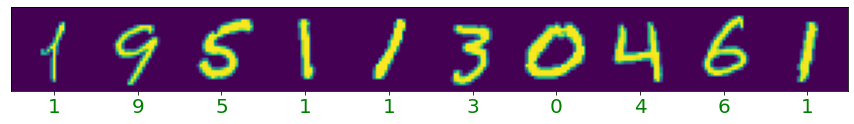

1/1 [==============================] - 0s 24ms/step


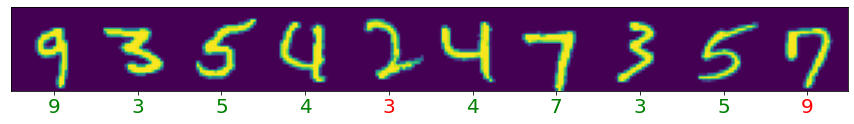

1/1 [==============================] - 0s 29ms/step


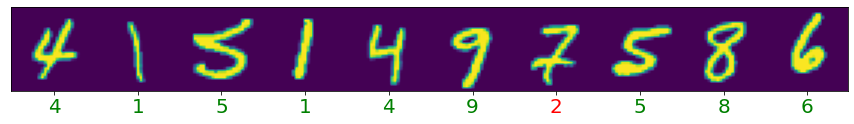

In [15]:
model = get_model()
model.fit(x_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=0,
          callbacks=[VisCallback(x_test, y_test)])

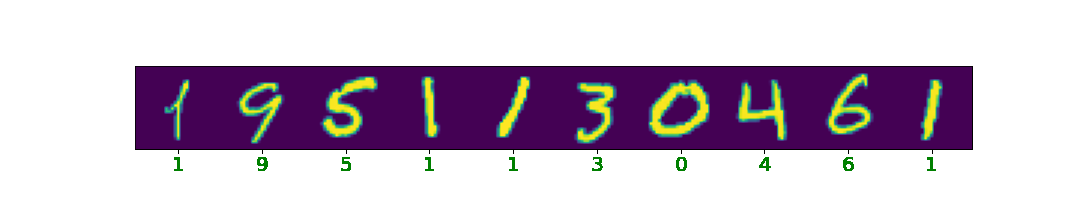

In [16]:
SCALE = 60

# FYI, the format is set to PNG here to bypass checks for acceptable embeddings
IPyImage(GIF_PATH, format='png', width=15 * SCALE, height=3 * SCALE) 